In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, preprocessing

In [22]:
# data
x = np.array([0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00,3.25,3.50, 4.00,4.25,
              4.50, 4.75, 5.00,5.50 ])
Y = np.array([0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1])

x = preprocessing.scale(x)
#no.of training examples
m,n = x.shape[0], 1
x = np.reshape(x, (m, 1))

# constructing matrix
ones = np.ones((m,1))
X = np.hstack([ones, x])

In [23]:
def learn_paramters(theta, X, Y, m, n, alpha=0.01):
    for i in range(0,n+1):
        value = 0
        for j in range(0, m):
            exponent = np.dot(theta.T, np.reshape(X[j:j+1,],(n+1,1)))[0,0]
            value += (Y[j] - (1/(1+np.exp(-exponent))))*X[j,i]
        theta[i,0] += alpha*value/m
    return theta

In [24]:
# initialize the parameter theta
theta = np.zeros((n+1,1))

# define learning rate
alpha = 0.001

while True:
    new_theta = learn_paramters(np.copy(theta), X,Y,m,n,alpha)
    
    loglikelihood_prev, loglikelihood_curr = 0,0
    for i in range(0,m):
        exp_prev = np.dot(theta.T, np.reshape(X[i:i+1,], (n+1,1)))[0,0]
        exp_curr = np.dot(new_theta.T, np.reshape(X[i:i+1,], (n+1,1)))[0,0]
        

        if Y[i] == 0:
            loglikelihood_prev += -np.log(1-(1/(1+np.exp(-exp_prev))))
            loglikelihood_curr += -np.log(1-(1/(1+np.exp(-exp_curr))))
        else:
            loglikelihood_prev += -np.log(1/(1+np.exp(-exp_prev)))
            loglikelihood_curr += -np.log(1/(1+np.exp(-exp_curr)))
    if abs(loglikelihood_prev - loglikelihood_curr) <= 0.0001:
        print(new_theta)
        break
    theta = np.copy(new_theta)

[[0.01735223]
 [1.39033211]]


In [25]:
# using sklearn Logistic regression
clf = linear_model.LogisticRegression()
clf.fit(x,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
clf.intercept_

array([0.03013113])

In [27]:
clf.coef_

array([[1.39750882]])

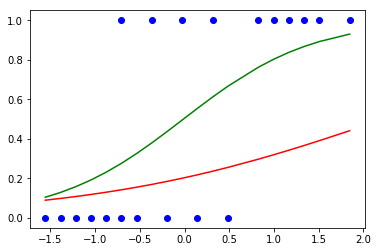

In [28]:
# visualization 
coff = np.array([[-1.36550178],[0.61126347]])

exponent_clf = np.dot(X, coff)
exponent_grad = np.dot(X, new_theta)
y_clf = (1/(1+np.exp(-exponent_clf)))
y_grad = (1/(1+np.exp(-exponent_grad)))

fig, aux = plt.subplots()
aux.plot(x,Y, 'bo', x, y_clf, 'r-', x, y_grad, 'g-')
plt.show()